# Análisis de patrones y preferencias de los clientes de taxis de Chicago para Zuber

# Contenido

* [Introducción](#a)
* [Objetivos](#b)
* [Etapas](#c)
* [Inicialización](#d)
    * [Cargar los datos](#d1)
    * [Exploración inicial de datos](#d2)
    * [Conclusiones del apartado](#d3)
* [Preprocesamiento de datos](#e)
    * [Corregir datos de data_neighb](#e1)
    * [Corregir datos de data_weather](#e2)
    * [Conclusiones del apartado](#e3)
* [Análisis exploratorio y descriptivo de datos](#f)
    * [Análisis de la tabla data_company](#f1)
    * [Análisis de la tabla data_neighb](#f2)
    * [Análisis de la tabla data_weather](#f3)
    * [Conclusiones del apartado](#f4)
* [Prueba de hipótesis](#g)
* [Conclusiones](#h)

# Introducción <a id='a'></a>

Una empresa de viajes compartidos, Zuber, está lanzando sus servicios en la ciudad de Chicago. Zuber requiere analizar los diversos patrones de comportamiento de los usuarios de esta ciudad y analizar si los factores externos afectan significativamente a los viajes.

Para este trabajo primero recuperamos información meteorológica de la ciudad de Chicago desde una página web utilizando técnicas de minería web. Luego, se logró tener acceso a las bases de datos relacionales de la empresa. Utilizamos el gestor de bases de datos relacionales PostgreSQL y realizando distintas operaciones con el lenguaje SQL sintetizamos toda esta información en tres datasets con los que trabajaremos para lograr los objetivos que se presentarán en el siguiente apartado.

# Objetivos <a id='b'></a>

La empresa requiere identificar a los 10 principales barrios y empresas de taxis, en términos de número de viajes promedio y número de viajes totales, respectivamente. Además, de manera más rigurosa, se busca que probemos la siguiente hipótesis en particular:
- La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

# Etapas del análisis <a id='c'></a>

En el desarrollo de este proyecto, seguiremos el siguiente esquema básico para mantener el proceso ordenado:

1. Inicialización: descripción de datos
2. Preprocesamiento de datos
3. Análisis exploratorio y descriptivo de datos
4. Prueba de hipótesis
5. Conclusiones

# Inicialización: descripción de los datos <a id='d'></a>

**Carga de librerías necesarias**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st 
# carga todas las librerías necesarias

## Cargar los datos <a id='d1'></a>

In [2]:
try:
    data_company = pd.read_csv('moved_project_sql_result_01.csv')
    data_neighb = pd.read_csv('moved_project_sql_result_04.csv')
    data_weather = pd.read_csv('moved_project_sql_result_07.csv')
except:
    data_company = pd.read_csv('/datasets/project_sql_result_01.csv')
    data_neighb = pd.read_csv('/datasets/project_sql_result_04.csv')
    data_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

## Exploración inicial de datos <a id='d2'></a>

Comenzaremos con la exploración de la tabla ``data_company``.

**Exploración de la tabla `data_company`**

Esta tabla, resultado de la agrupación de información de las bases de datos para los días 15 y 16 de noviembre de 2017, cuenta con la siguiente información:
* ``company_name``: nombre de la empresa de taxis.
* ``trips_amount``: número de viajes de cada compañía de taxis.

Ahora obtendremos su información:

In [3]:
data_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [4]:
data_company.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [5]:
data_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Analizando por columnas, tenemos lo siguiente:
* ``company_name`` no parece mostrar problemas, ni ausentes. Es una columna categórica.
* ``trips_amount`` no parece tener problemas ni ausentes. Aunque si nos fijamos en su descripción, observamos un gran sesgo positivo de su distribución: su media es bastante más grande que su mediana.

Echaremos un vistazo a la columna categórica de este dataset:

In [6]:
print("Valores únicos de la columna 'company_name':")
data_company['company_name'].unique()

Valores únicos de la columna 'company_name':


array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasin',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Associat', 'Checker Taxi Affiliation',
       'Blue Diamond', 'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha ride inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada',
       '6

No parecen existir problemas más allá de que sus valores usan mayúsculas en sus nombres. Ya que la agrupación la realizamos en SQL, no necesitamos obtener la distribución de valores, porque la tabla lo muestra en sí. 

Pasaremos a la siguiente columna.

**Exploración de la tabla ``data_neighb``**

Esta tabla también proviene de la manipulación de las bases de datos, en este caso mostrando los barrios y sus viajes en el mes de noviembre de 2017, con las siguientes columnas:
* ``dropoff_location_name``: barrios de Chicago donde finalizaron los viajes.
* ``average_trips``: promedio de viajes que terminaron en el respectivo barrio.

Exploremos este dataset:

In [7]:
data_neighb.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [8]:
data_neighb.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [9]:
data_neighb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Observando por columnas, tenemos:
* ``dropoff_location_name`` no parece mostrar problemas ni valores ausentes; es una variable categórica.
* ``average_trips`` no parece tener ausentes, aunque nuevamente notamos un gran sesgo en su distribución, siendo su media bastante más elevada que su mediana. Quizá sea recomendable redondear los valores promedio para no tener problemas en las interpretaciones y hacer el análisis más explicable. 

Exploraremos un poco más sobre la variable categórica de este dataset:

In [10]:
print("Valores únicos de la columna 'dropoff_location_name':")
data_neighb['dropoff_location_name'].unique()

Valores únicos de la columna 'dropoff_location_name':


array(['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare",
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul', 'Lincoln Park', 'East Village',
       'Little Italy, UIC', 'Uptown', 'Near South Side', 'Garfield Ridge',
       'Logan Square', 'Edgewater', 'West Town', 'Old Town',
       'Rush & Division', 'North Center', 'Lincoln Square', 'Rogers Park',
       'West Ridge', 'Irving Park', 'Hyde Park', 'Avondale',
       'Wicker Park', 'Albany Park', 'United Center', 'Lower West Side',
       'Douglas', 'Portage Park', 'Humboldt Park', 'Norwood Park',
       'Kenwood', 'Bridgeport', 'Armour Square', 'Jefferson Park',
       'Bucktown', 'North Park', 'Garfield Park', 'Mckinley Park',
       'Belmont Cragin', 'Boystown', 'Chinatown', 'Grand Boulevard',
       'Austin', 'Sauganash,Forest Glen', 'South Shore', 'Woodlawn',
       'Little Village', 'Jackson Park', 'North Lawndale', 'Dunning',
       'Ukrainian Village', 'Hermosa', 'Englewood'

No observamos problemas más allá del uso de mayúsculas en los nombres. De la misma forma que en el dataset anterior, ya que estos datos son agrupaciones obtenidas desde la base de datos, nos muestra la distribución de sus respectivos valores y ya no es necesario mostrarlo. 

Pasamos al último dataset.

**Exploración de la tabla ``data_weather``**

Este dataset combina datos obtenidos de una página web sobre información meteorológica de la ciudad de Chicago, el cual unimos con otras tablas de la base de datos para obtener la siguiente información:

* ``start_ts``: fecha y hora de la recogida, tomamos datos de solo los días sábados.
* ``weather_conditions``: condiciones climáticas en el momento en el que comenzó el viaje.
* ``duration_seconds``: duración del viaje en segundos.

Comenzaremos con la exploración:

In [11]:
data_weather.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [12]:
data_weather.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [13]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Analizando por columnas, tenemos:

* ``start_ts`` es de tipo fecha, sin embargo esto no está registrado correctamente. No se tienen valores ausentes en esta columna.
* ``weather_conditions`` es una variable dicotómica, con dos valores posibles que se le dieron en la obtención de datos desde la base de datos: "Good" y "Bad". No parece tener problemas ni valores ausentes.
* ``duration_seconds`` no parece mostrar problemas, aunque viendo su distribución notamos cierto sesgo y valores atípicos como ceros (viajes de 0 seg de duración), lo cual no parece tener mucho sentido. Analizaremos esto en el preprocesamiento siguiente.

Para confirmar lo dicho sobre nuestra variable categórica, mostraremos sus valores únicos:

In [14]:
print("Valores únicos de la columna 'weather_conditions':")
data_weather['weather_conditions'].unique()

Valores únicos de la columna 'weather_conditions':


array(['Good', 'Bad'], dtype=object)

Al igual que en los datasets previos, no se presentan problemas graves en los datos de esta tabla. En este caso podemos mostrar la distribución de valores para cada condición del tiempo que se tiene para complementar el análisis:

In [15]:
data_weather['weather_conditions'].value_counts(dropna=False)

Good    888
Bad     180
Name: weather_conditions, dtype: int64

Observamos que nuestra información detalla que la mayor parte del tiempo de los sábados de noviembre en Chicago tienen condiciones climáticas favorables para el desarrollo y operatividad de la empresa. 

## Conclusiones del apartado <a id='d3'></a>

Podemos concluir lo siguiente luego de haber explorado nuestros datos:

* En general, nuestros datasets no cuentan con problemas de valores ausentes ni errores.
* Las tres tablas, en sus respectivos valores numéricos, presentan importantes sesgos en sus datos, evidenciando la existencia de valores atípicos que necesitan ser tratados en los siguientes apartados.
* La tabla ``data_weather`` cuenta con una variable de tipo fecha que necesita ser corregida para facilitar su análisis.

# Preprocesamiento de datos <a id='e'></a>

Realizaremos el proceso para cada tabla, basándonos en las conclusiones mostradas del último apartado. Debido a que ``data_company`` no muestra errores para corregir en este apartado, pasaremos a la tabla ``data_neighb``.

## Corregir datos de ``data_neighb`` <a id='e1'></a>

La única recomendación en esta tabla para faciltar el análisis que dimos es la posibilidad de redondear sus valores numéricos, ya que cuentan con demasiados decimales y dificulta la interpretación. Por naturaleza, un viaje debe ser de tipo entero y realizaremos este proceso de corrección:

In [16]:
data_neighb['average_trips'] = data_neighb['average_trips'].round().astype('int') #redondea y convierte a entero
data_neighb['average_trips']

0     10727
1      9524
2      6665
3      5164
4      2547
      ...  
89        3
90        3
91        2
92        2
93        2
Name: average_trips, Length: 94, dtype: int32

Una vez solucionado, pasamos a la última tabla.

## Corregir datos de ``data_weather`` <a id='e2'></a>

Recordemos que este dataset necesita cambiar el tipo de datos de su columna ``start_ts`` porque estos son de tipo fecha:

In [17]:
data_weather['start_ts'] = pd.to_datetime(data_weather['start_ts'], format='%Y-%m-%d %H:%M:%S') #convierte a formato fecha
data_weather['start_ts']

0      2017-11-25 16:00:00
1      2017-11-25 14:00:00
2      2017-11-25 12:00:00
3      2017-11-04 10:00:00
4      2017-11-11 07:00:00
               ...        
1063   2017-11-25 11:00:00
1064   2017-11-11 10:00:00
1065   2017-11-11 13:00:00
1066   2017-11-11 08:00:00
1067   2017-11-04 16:00:00
Name: start_ts, Length: 1068, dtype: datetime64[ns]

Debido a los filtros realizados en las bases de datos para obtener esta información, sospechamos de la existencia de valores duplicados explícitos, los cuales no tendrían un valor útil en el momento de analizar esta información. Echaremos un vistazo para ellos:

In [18]:
round(data_weather.duplicated().sum()/len(data_weather) * 100, 4) #obtiene la proporción y la redondea

18.4457

Tenemos un 18 % de valores duplicados explícitos, pero nos falta averiguar la naturaleza de estos:

In [19]:
data_weather[data_weather.duplicated()].head(10)

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
125,2017-11-11 08:00:00,Good,1380.0
126,2017-11-11 09:00:00,Good,1380.0
130,2017-11-11 10:00:00,Good,1260.0
179,2017-11-11 06:00:00,Good,1260.0
190,2017-11-04 08:00:00,Good,1323.0


Debido a que truncamos por horas en las bases de datos, es posible que al agrupar los datos estos se hayan repetido. Otra posibilidad es que tengamos registros muy similares en hora y duración, es decir, viajes de otros vehículos. Decidiremos mantener esta información debido a que estas opciones son bastante razonables, y también porque estos datos en sí podrían proporcionar información relevante para el análisis.

La etapa del preprocesamiento se puede dar por concluida hasta este momento.

## Conclusiones del apartado <a id='e3'></a>

* Logramos corregir los problemas más importantes de nuestros datasets, los cuales en ambos casos se referían a los formatos en los que estaban registrados algunas columnas.
* Encontramos duplicados explícitos en la tabla ``data_weather``, pero es posible que este suceso se explique por la forma en la que obtuvimos y procesamos los datos en las bases de datos, así que decidimos mantenerlos.

# Análisis exploratorio y descriptivo de datos <a id='f'></a>

En esta etapa exploraremos los datos de cada tabla en búsqueda de tratar los demás problemas existentes y describir el comportamiento de uso de los clientes, para finalmente cumplir con los objetivos del trabajo. Empezaremos con ``data_company``.

## Análisis de la tabla ``data_company`` <a id='f1'></a>

La columna numérica de esta tabla presentaba un sesgo que nos faltaba analizar. Usaremos gráficos para analizar un poco más acerca de este fenómeno:

<Figure size 1000x1000 with 0 Axes>

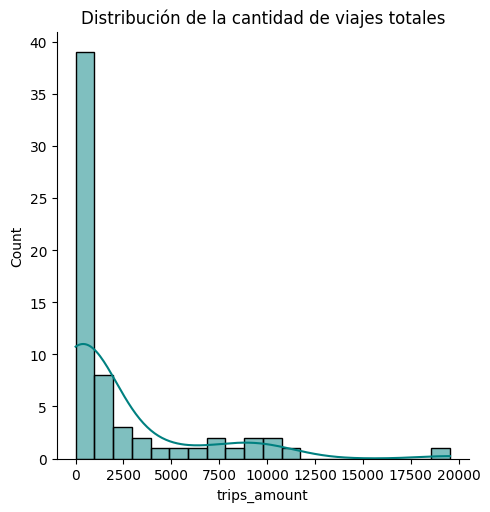

In [20]:
plt.figure(figsize=(10,10))
sns.displot(data=data_company, x='trips_amount', kde=True, color='teal', bins=20)
plt.title('Distribución de la cantidad de viajes totales')
plt.show()

Al tratarse de una agrupación, este gráfico nos muestra que la mayor parte de las compañías de taxis tienen menos de 2000 viajes en el periodo de análisis. Para simplificar el proceso, agruparemos a estas empresas "pequeñas" en una categoría nueva. Para automatizar el proceso, crearemos un límite porcentual respecto al total de los viajes para delimitar a las empresas muy pequeñas y a las relevantes para el análisis de la siguiente manera:

In [21]:
limit_small_companies = data_company['trips_amount'].sum()*0.01 # el 1 % de los viajes totales será el umbral de delimitación
limit_small_companies

1373.1100000000001

¿Cuántas empresas quedarán agrupadas en esta nueva categoría?

In [22]:
len(data_company.query("trips_amount < @limit_small_companies")['company_name'].unique())

42

Obtendremos los nombres de las compañías grandes para realizar el filtro utilizando el método "where":

In [23]:
big_companies_names = data_company.query("trips_amount > @limit_small_companies")['company_name'].unique()
big_companies_names

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasin',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Associat', 'Checker Taxi Affiliation',
       'Blue Diamond', 'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United'],
      dtype=object)

La categoría será "Other small companies".

In [24]:
data_company['company_name'] = data_company['company_name'].where(
                                                            data_company['company_name'].isin(big_companies_names),
                                                            'Other small companies'
                                                            )

**Identificando a las 10 principales compañías por cantidad total de viajes**

Ahora podemos graficar a las compañías por cantidad total de viajes:

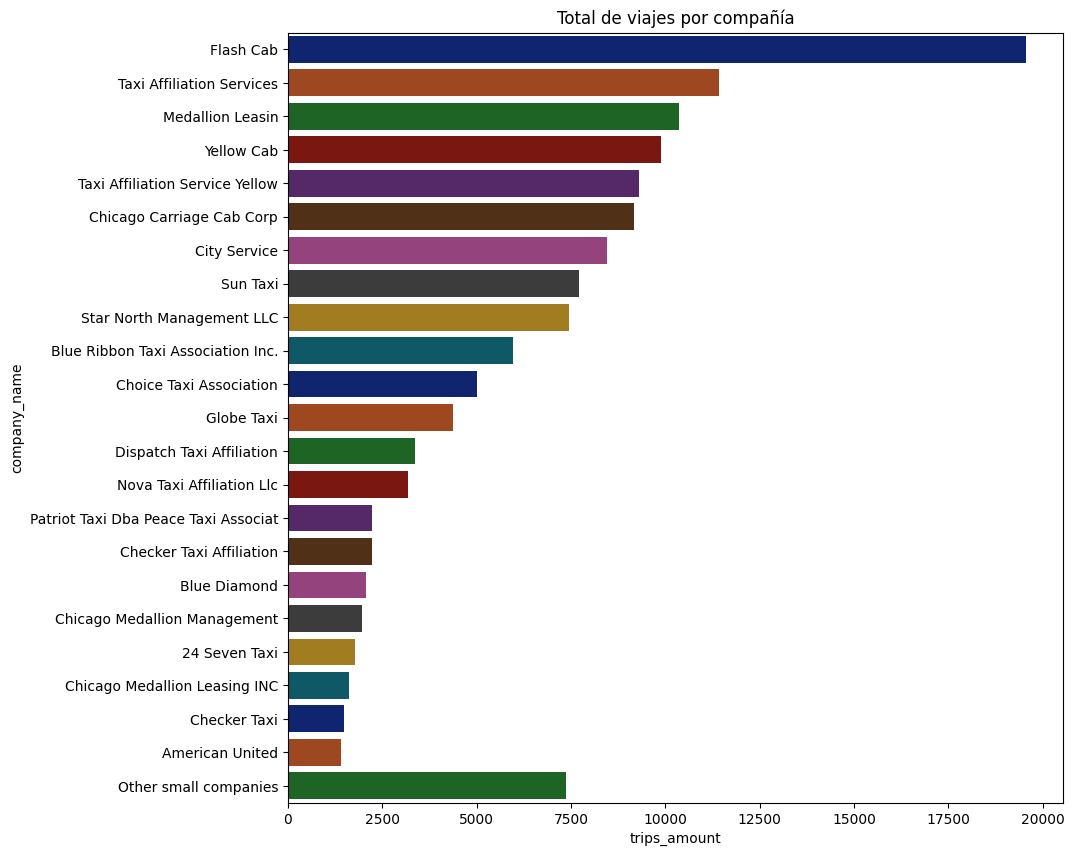

In [25]:
plt.figure(figsize=(10,10))
sns.barplot(
    data=data_company,
    x='trips_amount',
    y='company_name',
    estimator='sum',
    errorbar=None,
    palette='dark'
)
plt.title("Total de viajes por compañía")
plt.show()

Recordando que esta información se tomó el 15 y 16 de noviembre del 2017, las 10 principales compañías son (sin tener en cuenta a las compañías pequeñas):

In [26]:
data_company.sort_values(by='trips_amount', ascending=False).head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Lo más resaltante del gráfico es el primer lugar en importancia por cantidad de viajes. Se trata de la compañía ``Flash Cab``, con una mayoría bastante significativa respecto al segundo lugar (``Taxi Affiliation Services``): 19 558 viajes respecto a 11422.

Si tenemos en cuenta a la categoría que contempla a las empresas pequeñas, esta categoría se encontraría en el 10mo lugar, reemplazando a `` Blue Ribbon Taxi Association Inc``.

Otro detalle a resaltar es el color: las empresas que indican el color amarilllo (*Yellow*) en su nombre, tienden a tener más cantidad de viajes que los de color azul (*Blue*). Generalmente el color amarillo de un vehículo está asociado a este tipo de empresas, y parece tener algo de relevancia en el total de viajes. Obtener el color de vehículos de cada empresa y analizar al respecto de manera más rigurosa podría ser otra ventana de análisis en el futuro para la empresa.

## Análisis de la tabla ``data_neighb`` <a id='f2'></a>

Recordemos que esta tabla también presentaba un sesgo importante en su distribución. Ahora lo veremos de forma gráfica:

<Figure size 1000x1000 with 0 Axes>

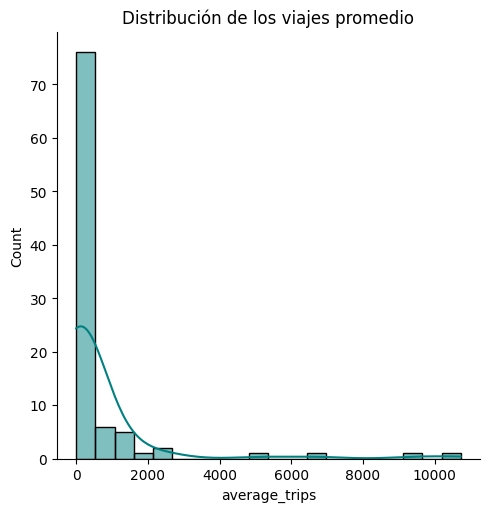

In [27]:
plt.figure(figsize=(10,10))
sns.displot(data=data_neighb, x='average_trips', kde=True, color='teal', bins=20)
plt.title('Distribución de los viajes promedio')
plt.show()

Del gráfico y método de agrupación podemos afirmar que muchos barrios tienen pocos viajes. De igual forma que en el caso anterior, agruparemos en base a un umbral porcentual respecto al promedio total para agrupar a los barrios menos relevantes:

In [28]:
limit_small_neighb = data_neighb['average_trips'].sum() * 0.01 # el umbral de delimitación nuevamente a un 1 %
limit_small_neighb

563.96

¿Cuántos barrios se agruparán en esta nueva categoría?

In [29]:
len(data_neighb.query("average_trips < @limit_small_neighb")['dropoff_location_name'].unique())

76

Obtendremos la lista de los nombres de los barrios más usuales para usarlos en la condición de "where":

In [30]:
big_neighb_names = data_neighb.query("average_trips > @limit_small_neighb")['dropoff_location_name'].unique()
big_neighb_names

array(['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare",
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul', 'Lincoln Park', 'East Village',
       'Little Italy, UIC', 'Uptown', 'Near South Side', 'Garfield Ridge',
       'Logan Square', 'Edgewater'], dtype=object)

Usamos el método where y la nueva categoría será "Other small neighborhoods":

In [31]:
data_neighb['dropoff_location_name'] = data_neighb['dropoff_location_name'].where(
                                                                                data_neighb['dropoff_location_name'].isin(big_neighb_names),
                                                                                'Other small neighborhods'
                                                                                )

**Identificando a los 10 principales barrios por número promedio de finalizaciones**

Ahora podemos graficar a los barrios por número de finalizaciones:

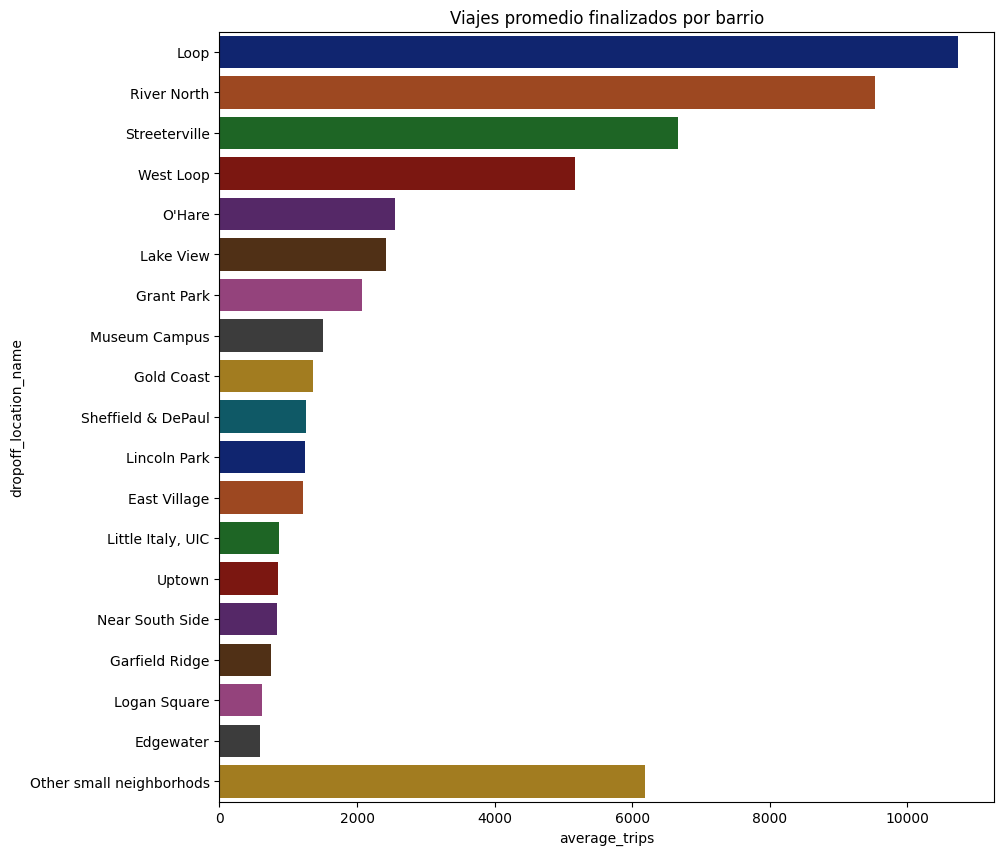

In [32]:
plt.figure(figsize=(10,10))
sns.barplot(
    data=data_neighb,
    x='average_trips',
    y='dropoff_location_name',
    estimator='sum',
    errorbar=None,
    palette='dark'
)
plt.title("Viajes promedio finalizados por barrio")
plt.show()

Los diez principales barrios en términos de finalización promedio de viajes en Chicago (sin tener en cuenta a los barrios agrupados con menos viajes promedio) resultan ser los siguientes:

In [33]:
data_neighb.sort_values(by='average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


Podemos resaltar del gráfico que el barrio top en términos de viajes realizados es ``Loop`` (10 727 viajes), el cual es lo que denominaríamos el centro de la ciudad de Chicago. El segundo lugar, ``River North``, no está tan lejos (9 524 viajes); esto podría deberse a la importancia de este barrio en la ciudad. Para el tercer lugar, ``Streeterville`` (6 665 viajes), ya notamos una relativa menos cantidad. A partir de ``O'Hare`` (donde se ubica uno de los aeropuertos más importantes de la ciudad) la cantidad de viajes empieza a ser más pareja, de forma decreciente. 

Si tenemos en cuenta a los barrios agrupados por un menor número de viajes, estos se ubicarían en el tercer lugar del ranking.

Para nuestra prueba de hipótesis estadística, usaremos los viajes entre el downtown (*Loop*) y el aeropuerto principal de la ciudad (*O'Hare*) como muestra representativa del comportamiento de los usuarios.

## Análisis de la tabla ``data_weather`` <a id='f3'></a>

La distribución de su variable numérica no presentaba problemas aparentes, así que la graficaremos para cerciorarnos de ello:

<Figure size 1000x1000 with 0 Axes>

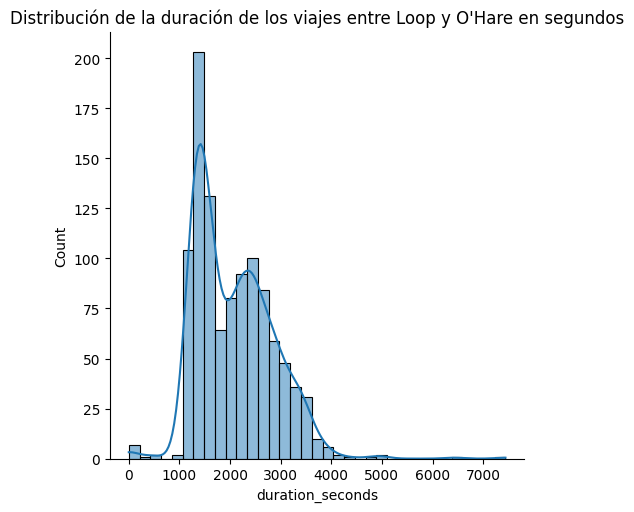

In [34]:
plt.figure(figsize=(10,10))
sns.displot(data=data_weather, x='duration_seconds', kde=True, bins=35)
plt.title('Distribución de la duración de los viajes entre Loop y O\'Hare en segundos')
plt.show()

La distribución tiene una forma bimodal, resaltando dos picos en la distribución de la duración del viaje: uno cerca de los 1500 segundos y el otro por los 2500 segundos. Este comportamiento se explicaría por la posible distinta duración de un viaje cuando las condiciones meteorológicas son adversas: uno esperaría que en este caso, la duración sea mayor que cuando el tiempo es adecuado. De hecho, esto es lo que intentaremos probar para nuestra hipótesis estadística final, así que por ahora nos centraremos en el análisis exploratorio. 

Otro detalle que podemos resaltar es la presencia de valores atípicos en esta variable, pero para delimitarlos correctamente usaremos el diagrama de caja y sus estimaciones en base al rango intercuartil:

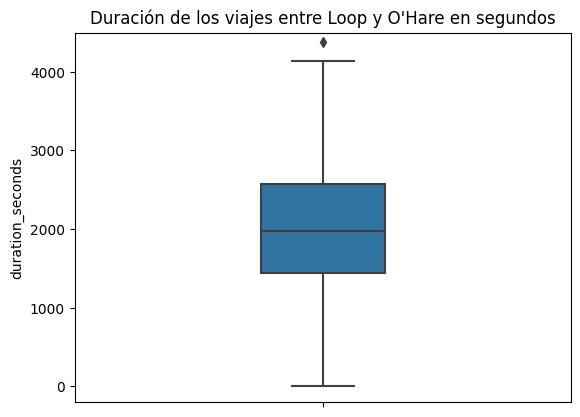

In [35]:
sns.boxplot(data=data_weather, y='duration_seconds', width=0.25)
plt.title('Duración de los viajes entre Loop y O\'Hare en segundos')
plt.ylim(-200, 4500)
plt.show()

In [36]:
Q1 = data_weather['duration_seconds'].quantile(0.25)
Q3 = data_weather['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

print(f"El límite superior teórico es {Q3 + 1.5*IQR}")
print(f"El límite inferior teórico es {Q1 - 1.5*IQR}")

El límite superior teórico es 4292.625
El límite inferior teórico es -274.375


Tal como muestra los resultados, podemos considerar a valores atípicos superiores a partir de los 4300 segundos de duración, pero por el hecho de que nuestra distribución parece tener dos agrupaciones, ampliaremos un poco este límite hacia los 4500 segundos y contaremos cuántos datos caen dentro de este intervalo:

In [37]:
len(data_weather.query("duration_seconds > 4500"))

5

Esta pequeña cantidad representa un porcentaje mínimo respecto al total de más de 1000 filas de información. Entonces, procedemos a crear un nuevo dataset sin estos valores atípicos:

In [38]:
data_weather_final = data_weather.query("duration_seconds < 4500")
data_weather_final

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


Dado que los datos eliminados fueron mínimos, no esperamos grandes cambios en la distribución de ``duration_seconds``. Por eso no se ve necesario graficar la nueva distribución. Este sería nuestro dataset final y no parecen existir más problemas en esta tabla.

Nos quedaría finalmente abordar el último objetivo del trabajo, el cual comparará si realmente existen diferencias en la duración de los viajes a causa de las condiciones climáticas. Antes de ello, unas pequeñas conclusiones.

## Conclusiones del apartado <a id='f4'></a>

Del análisis realizado para cada tabla, podemos concluir lo siguiente:

* De ``data_company``, concluimos que la empresa de taxis líder con gran diferencia es *Flash Cab*. Le sigue *Taxi Affiliation Services*, etc. También pudimos notar que el factor color de la empresa (y sus vehículos) podría influir en el comportamiento del usuario.
* De ``data_neighb``, concluimos que el barrio top en términos de viajes realizados es el downtown de Chicago, conocido como *Loop*, al que le sigue *River North*. En ambos casos el motivo más evidente es la importancia de cada uno de estos barrios en términos económicos y sociales.
* En ``data_weather`` pudimos observar que la variable numérica (*duration_seconds*) tiene una distribución con forma bimodal posiblemente debido a la diferencia de comportamiento para las dos condiciones meteorológicas. Luego nos deshicimos de sus valores atípicos y demostraremos esta última hipótesis de forma más rigurosa.

# Prueba de hipótesis: si las condiciones meteorológicas afectan la duración de los viajes <a id='g'></a>

Se nos dio como objetivo probar lo siguiente:

*La duración promedio de los viajes desde el Loop hasta el Aeropuesto Internacional O'Hare cambia los sábados lluviosos.* 

Nuestras hipótesis nula y alterna se podrían reescribir de la siguiente forma:

$H_0:$ la duración media de los viajes entre Loop y O'Hare los sábados lluviosos es la misma

$H_1:$ la duración media de los viajes entre Loop y O'Hare los sábados lluviosos es diferente

Para esto, necesitamos dividir nuestro último dataset para cada condición meteorológica:

In [39]:
data_weather_good = data_weather_final.query("weather_conditions == 'Good'")
data_weather_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 1066
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            884 non-null    datetime64[ns]
 1   weather_conditions  884 non-null    object        
 2   duration_seconds    884 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.6+ KB


In [40]:
data_weather_bad = data_weather_final.query("weather_conditions == 'Bad'")
data_weather_bad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 6 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            179 non-null    datetime64[ns]
 1   weather_conditions  179 non-null    object        
 2   duration_seconds    179 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.6+ KB


In [41]:
data_weather_good['duration_seconds'].describe() #estadísticos cuando las condiciones son "good"

count     884.000000
mean     1981.981900
std       709.994612
min         0.000000
25%      1385.750000
50%      1800.000000
75%      2460.000000
max      4380.000000
Name: duration_seconds, dtype: float64

In [42]:
data_weather_bad['duration_seconds'].describe() # estadísticos cuando las condiciones son "bad"

count     179.000000
mean     2412.944134
std       697.424940
min       480.000000
25%      1944.000000
50%      2520.000000
75%      2914.500000
max      4044.000000
Name: duration_seconds, dtype: float64

Comparando a simple vista tanto medias y medianas, podemos observar que existe cierta diferencia. Antes de decidirnos probar la hipótesis, debemos saber si estas muestras tienen una distribución normal. Para esta labor usaremos el test de Shapiro-Wilk de la librería SciPy. 

Este test tiene las siguientes hipótesis:

Hipótesis nula: $H_0:$ la muestra sigue una distribución normal.

Hipótesis alternativa: $H_1:$ la muestra no sigue una distribución normal (no se comprueba $H_0$).

Nivel de significancia $\alpha = 0.05$

Criterio de decisión: Si  p-value $< \alpha$, se rechaza $H_0$. De lo contrario, no se rechaza $H_0$.

In [43]:
st.shapiro(data_weather_good['duration_seconds'])

ShapiroResult(statistic=0.9374929666519165, pvalue=8.428627678949025e-19)

En este caso, el p-valor es bastante menor que nuestro nivel de significancia y podemos rechazar la hipótesis nula de normalidad. En otras palabras, tenemos bastante certeza de que este la distribución de la duración de los viajes cuando las condiciones del tiempo son buenas no sigue una distribución normal. Ahora veremos para cuando el tiempo presenta malas condiciones:

In [44]:
st.shapiro(data_weather_bad['duration_seconds'])

ShapiroResult(statistic=0.9732568860054016, pvalue=0.0016123165842145681)

De igual forma, el resultado del test nos lleva a rechazar la hipótesis nula de normalidad porque el pvalue es considerablemente menor a $\alpha$, concluyendo que esta distribución para cuando las condiciones meteorológicas son malas muy probablemente no se aproxima a una normal.

Gracias a estos resultados podemos decidir usar una prueba no paramétrica para probar nuestra hipótesis. El test de Mann-Whitney U nos será de utilidad en este caso, el cual nos lleva a reescribir las hipótesis:

Hipótesis nula: $H_0:$ Ambos grupos tienen medianas iguales (distribuciones similares)

Hipótesis alternativa: $H_1:$ Ambos grupos no tienen medianas iguales (no se comprueba $H_0$)

Nivel de significancia $\alpha = 0.05$

Criterio de decisión: Si  $p-value < \alpha$, se rechaza $H_0$. De lo contrario, no se rechaza $H_0$.

In [45]:
alpha = 0.05 # nivel de significancia

statistic_1, p_value_1 = st.mannwhitneyu(data_weather_good['duration_seconds'], data_weather_bad['duration_seconds']) #test de Mann-Whitney

print(f"p-value: {p_value_1}") 

if p_value_1 < alpha: # si el pvalue es menor que el resultado
    print("Rechazamos la hipótesis nula") # rechaza H0
else:
    print("No rechazamos la hipótesis nula")

p-value: 5.209083288090433e-14
Rechazamos la hipótesis nula


**Resultados y conclusiones del apartado**

La prueba nos lleva a rechazar nuestra hipótesis nula en la cual la duración media de los viajes no difería los sábados lluviosos. Esta hipótesis se puede rechazar incluso con un $\alpha$ de 0.01. 

Entonces ahora podemos afirmar con más certeza lo que habíamos teorizado acerca de que los viajes tienden a durar más cuando el tiempo no es favorable. De hecho, numéricamente, los viajes promedio entre el Loop y O'Hare con buenas condiciones meteorológicas duran 1982 segundos (33 minutos aprox.), mientras que con malas condiciones del tiempo, suben hasta los 2413 segundos (40.2 minutos).

# Conclusiones <a id='h'></a>

**Conclusiones del preprocesamiento de datos**

* Los mayores problemas de nuestros datasets eran los formatos de algunas columnas, especialmente el de fechas, y fueron corregidos.
* En la tabla ``data_weather`` se encontraron valores duplicados, pero no se eliminaron porque posiblemente sea información que por su forma de obtención se haya resumido así, a la vez que podría proporcionar información importante luego.

**Conclusiones del análisis exploratorio y descriptivo**

* La empresa líder en términos de viajes totales es *Flash Cab*, con un amplio margen respecto al segundo, *Taxi Affiliation  Services*. También tenemos observamos cierta tendencia a que el color pueda afectar a los viajes totales.
* El barrio más frecuentado por los usuarios o con más viajes promedio resultó ser el downtown de Chicago: *Loop*. Le sigue *River North*. Este orden se ve explicado por la relevancia de ambos barrios en la ciudad de Chicago.
* La columna referida a la duración de los viajes mostró una distribución con dos picos, ambos relacionados a la existencia de un patrón o factor que luego profundizaríamos: las condiciones meteorológicas. A la vez, delimitamos y nos deshicimos de sus valores atípicos.

**Conclusiones de la prueba de hipótesis**

* Al crear slices de datos para cada condición meteorológica, observamos que ambas muestras no seguían una distribución normal según el test de Shapiro. Esto nos llevó a utilizar una prueba no paramétrica (test de Mann-Whitney U) para probar nuestra hipótesis final.
* Utilizando el referido test, no pudimos demostrar que los viajes tengan la misma duración promedio. Al contrario, tenemos bastante certeza de que la duración promedio de ambas condiciones del tiempo son diferentes.
* Analizando sus estadísticos, vimos que esta diferencia se explica porque, en promedio, los viajes entre Loop y O'Hare son más largos cuando llueve que cuando no.